# Introduction


## **The objective** 
To predict which type of customers would have a risk of being default 

## Datasets and Features
**Default Customer** : if a customer does not pay due amount in 120 days after the latest statement date

##


# Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import Dataset
- parquet file :train_data, test_data
- pickle file: train_labels

In [2]:
train = pd.read_parquet('train_data.parquet', engine='fastparquet')
test = pd.read_parquet('test_data.parquet', engine='fastparquet')
labels = pd.read_pickle('train_labels.pkl')
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


# EDA

In [12]:
columns_list = train.columns.tolist()
D_col_list = []
for col in columns_list:
    if col.startswith('D') ==True:
        D_col_list.append(col)
print('Delinquency variables :',len(D_col_list))

Delinquency variables : 96


In [15]:
train.loc[:,D_col_list].isna().sum() > 0

D_39     False
D_41      True
D_42      True
D_43      True
D_44      True
         ...  
D_141     True
D_142     True
D_143     True
D_144     True
D_145     True
Length: 96, dtype: bool

<AxesSubplot:>

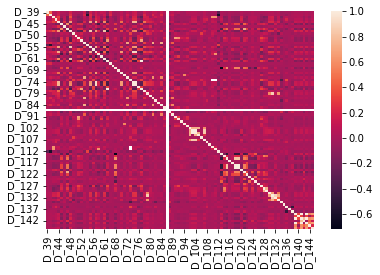

In [16]:
sns.heatmap(train.loc[:,D_col_list].corr())